In [2]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

# Exercise 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let us consider a database containing the relative consumption of certain food items in European countries.

The numbers represent the percentage of the population consuming that food type

In [5]:
data = pd.read_csv('https://openmv.net/file/food-consumption.csv').fillna(0)
data
data.describe()
A = data.to_numpy()[:,1:].T.astype(np.float64)
countries = data.to_numpy()[:,0]
foods = np.array(data.columns[1:])

A.shape, countries.shape

((20, 16), (16,))

Each column of the matrix A refers to a country, and each row represents a specific food. The arrays countries and foods contain the list of countries and foods, respectively

In [6]:
n_samples = A.shape[1]
print('There are %d samples' %n_samples)

There are 16 samples


 Perform PCA on the dataset by means of the SVD decomposition. 
 
 Then, plot the trend of singular values,cumulative fraction of singular values and explained variance.

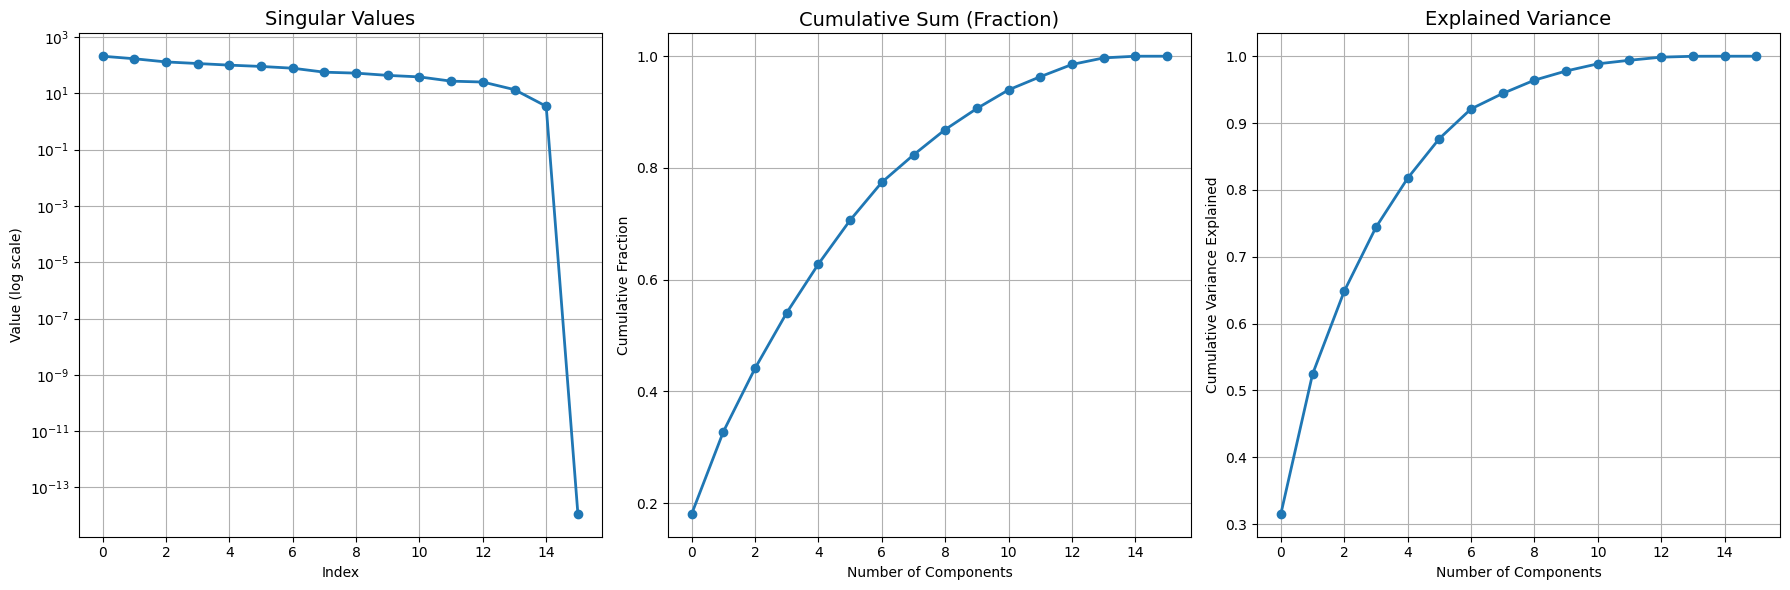

In [7]:
A_mean = np.mean(A, axis=1)
A_bar = A - A_mean[:,None]
U, s, VT = np.linalg.svd(A_bar, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Singular values
axs[0].semilogy(s, 'o-', linewidth=2, markersize=6)
axs[0].set_title('Singular Values', fontsize=14)
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value (log scale)')
axs[0].grid(True)

# Cumulative fraction of singular values
cumulative_frac = np.cumsum(s) / np.sum(s)
axs[1].plot(cumulative_frac, 'o-', linewidth=2, markersize=6)
axs[1].set_title('Cumulative Sum (Fraction)', fontsize=14)
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Cumulative Fraction')
axs[1].grid(True)

# Explained variance (squared singular values)
explained_variance = np.cumsum(s**2) / np.sum(s**2)
axs[2].plot(explained_variance, 'o-', linewidth=2, markersize=6)
axs[2].set_title('Explained Variance', fontsize=14)
axs[2].set_xlabel('Number of Components')
axs[2].set_ylabel('Cumulative Variance Explained')
axs[2].grid(True)

plt.tight_layout()
plt.show()


Print the first two principal directions.

In [9]:
p_dir_1 = U[:,0]
p_dir_2 = U[:,1]

print(f'first principal direction: {p_dir_1}')
print(f'second principal direction: {p_dir_2}')

first principal direction: [ 0.03798527 -0.1337862  -0.2687898  -0.1604466  -0.11954424 -0.08332813
 -0.28509817 -0.05679119 -0.09552423 -0.14474104 -0.12602957 -0.04027136
 -0.29608149 -0.33615173  0.57152639 -0.10427176 -0.17721325  0.34102375
  0.0037325  -0.2084555 ]
second principal direction: [-0.18194259  0.45509041 -0.00787195 -0.01802302  0.35983694  0.23387602
  0.12460296 -0.04784199 -0.15336669 -0.08188076  0.2447234   0.13248793
  0.30161676  0.07463049  0.26561426  0.10933455  0.04342564  0.19444716
  0.27533512 -0.39393754]


Which are the more important foods for these two directions?

C:\Users\manse\AppData\Local\Temp\ipykernel_26532\1148473050.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(foods, rotation=90)
C:\Users\manse\AppData\Local\Temp\ipykernel_26532\1148473050.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(foods, rotation=90)


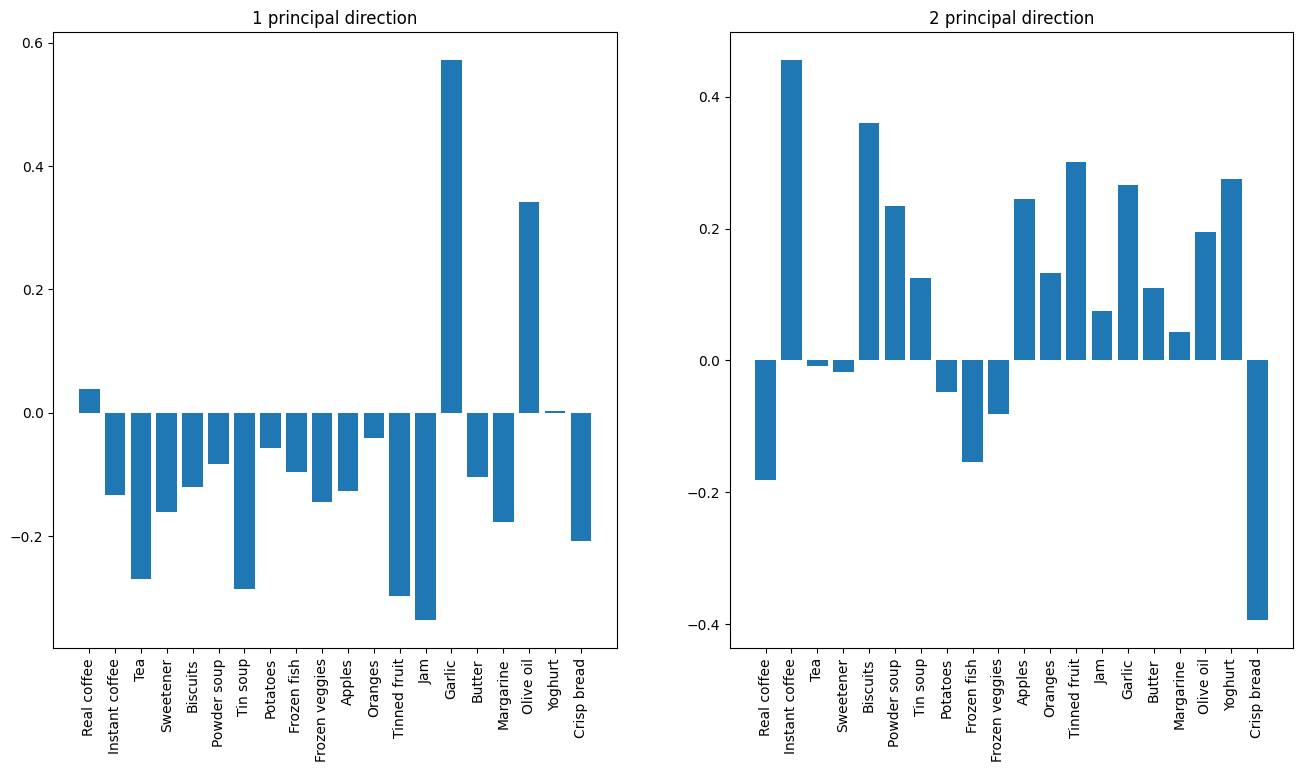

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
for i in range(2):
    axs[i].bar(foods, U[:, i])
    axs[i].set_xticklabels(foods, rotation=90)
    title = str(i+1) + ' principal direction'
    axs[i].set_title(title)

In [11]:
# Get indices of top contributing foods (by absolute value)
top1_idx = np.argsort(np.abs(p_dir_1))[::-1]
top2_idx = np.argsort(np.abs(p_dir_2))[::-1]

# Print top 5 foods for each PC
print("Top foods for PC1:")
for i in top1_idx[:5]:
    print(f"{foods[i]}: {p_dir_1[i]:.4f}")

print("\nTop foods for PC2:")
for i in top2_idx[:5]:
    print(f"{foods[i]}: {p_dir_2[i]:.4f}")

Top foods for PC1:
Garlic: 0.5715
Olive oil: 0.3410
Jam: -0.3362
Tinned fruit: -0.2961
Tin soup: -0.2851

Top foods for PC2:
Instant coffee: 0.4551
Crisp bread: -0.3939
Biscuits: 0.3598
Tinned fruit: 0.3016
Yoghurt: 0.2753


Knowing that mediterranean cuisine envisages a large use of garlic and olive oil, compared to the European average, do you expect a positive or negative 1st principal component for Italy?

Positive

Print the first two principal components.

In [14]:
PHI = U.T @ A_bar

p_com_1 = PHI[:,0]
p_com_2 = PHI[:,1]

print(f'first principal component: {p_com_1}')
print(f'second principal component: {p_com_2}')

first principal component: [-2.25817979e+01  1.15678637e+01 -1.55903825e+01  6.07152480e+00
  1.16057371e+01  3.35499608e+00 -1.10021341e+01 -2.60889359e+01
  1.60235615e+01  5.60571854e+00  7.75547627e+00  8.02738160e+00
 -6.14215605e+00  1.49977538e+00 -1.98467317e+00  1.92554306e-15]
second principal component: [ 7.98980825e+01 -9.45629416e+00  2.08100354e+01  1.76867442e+01
  4.78292621e+00  2.62231140e+01 -2.11950629e+01  8.45404038e+00
  9.71788408e+00 -4.37200157e-01 -1.36626362e+01 -8.71877703e+00
 -1.23727889e+01  2.33795419e+00  1.05648080e-01 -1.62717062e-15]


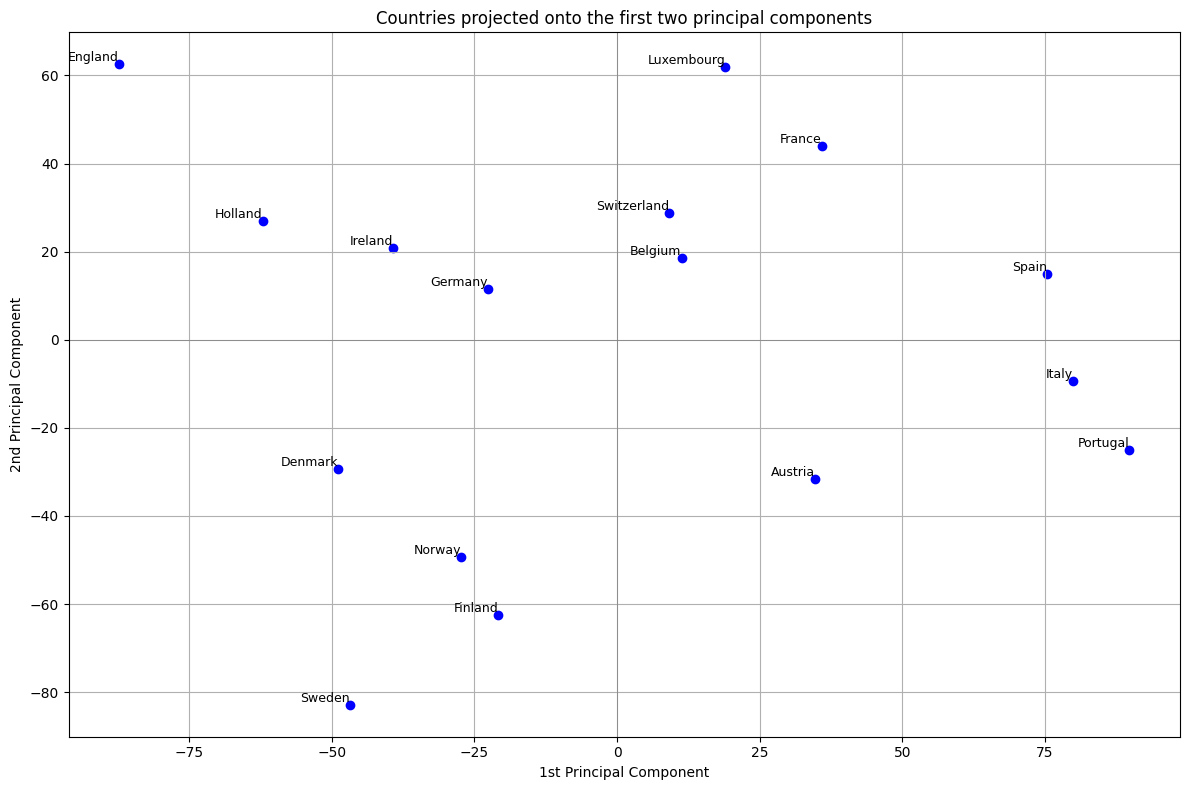

In [17]:
x = PHI[0, :]  # First principal component
y = PHI[1, :]  # Second principal component

plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue')

# Annotate each point with its country name
for i, country in enumerate(countries):
    plt.text(x[i], y[i], country, fontsize=9, ha='right', va='bottom')

plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Countries projected onto the first two principal components')
plt.grid(True)
plt.tight_layout()
plt.show()


Based on these results: In which European region do you expect a large consume of crisp bread? Why? Is this confirmed by the original data?

Sweden, Finland and Norway because they have the smallest second principal component which is associated to the crisp bread based on the principal directions analyzed before.

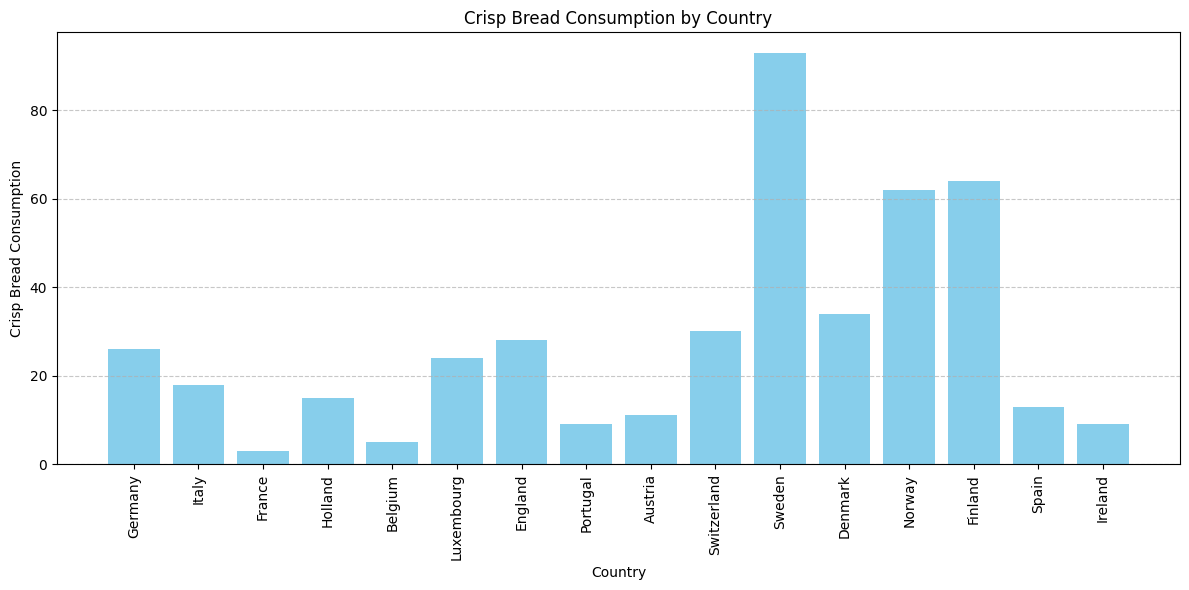

In [ ]:
countries = data['Country'].tolist()
crisp_bread = data['Crisp bread'].values

plt.figure(figsize=(12, 6))
plt.bar(countries, crisp_bread, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Crisp Bread Consumption')
plt.title('Crisp Bread Consumption by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Which countries have food habits that are similar to Italy?

We expect Spain and Portugal to have similar food habits to Italy that's because they have  avery similar first principal component.

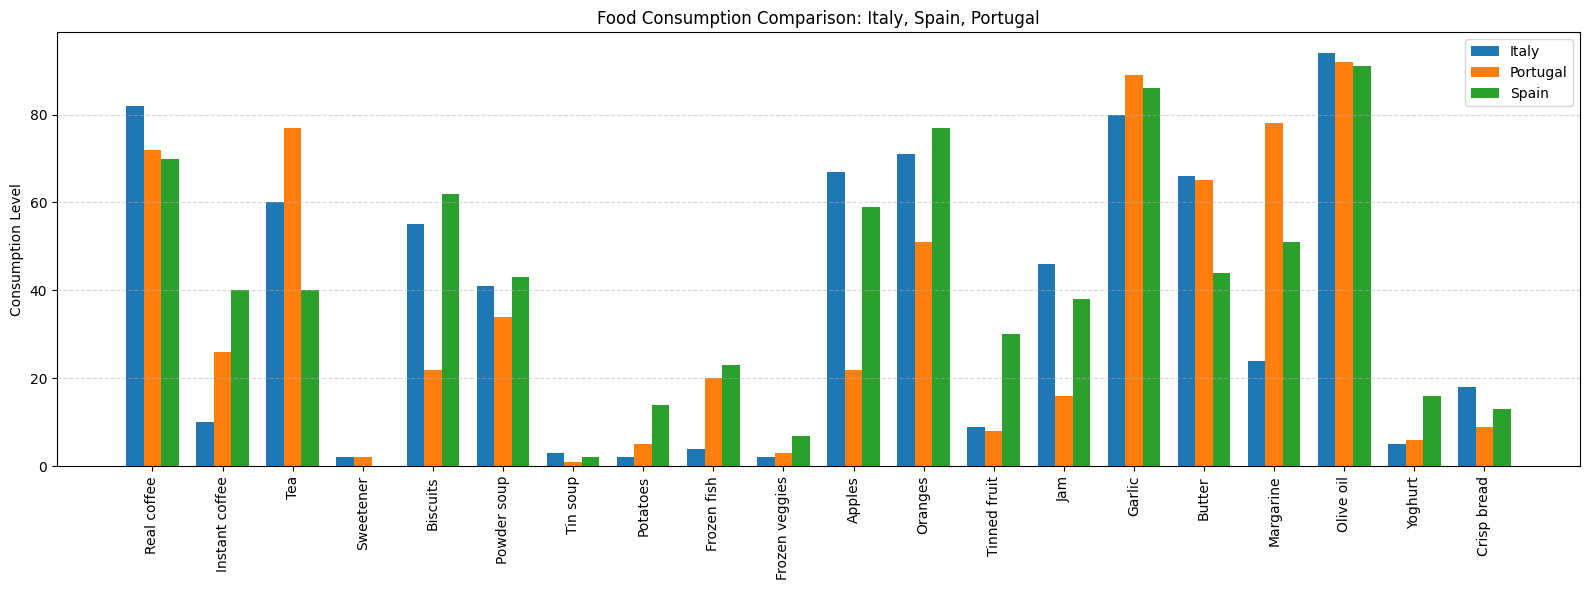

In [ ]:
# Filter countries
subset = data[(data['Country'] == 'Italy') | 
              (data['Country'] == 'Spain') | 
              (data['Country'] == 'Portugal')]

# Set up food columns and country names
food_columns = data.columns.drop('Country')
country_names = subset['Country'].tolist()
food_data = subset[food_columns].values  # shape: (3, num_foods)

# Set bar positions
num_foods = len(food_columns)
x = np.arange(num_foods)  # base positions
bar_width = 0.25

# Plot
plt.figure(figsize=(16, 6))

for i in range(3):  # 3 countries
    plt.bar(x + i * bar_width, food_data[i], width=bar_width, label=country_names[i])

# Axis labels and formatting
plt.xticks(x + bar_width, food_columns, rotation=90)
plt.ylabel("Consumption Level")
plt.title("Food Consumption Comparison: Italy, Spain, Portugal")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Based on the two first principal components, what do you expect about the food habits in England? Is this confirmed by the original data?

From the first principal component we expect a large consume of Tea, Tin Soup and Jam.

From the second principal component we expect a large consume of Instant Coffee, Biscuits and Yogurt.

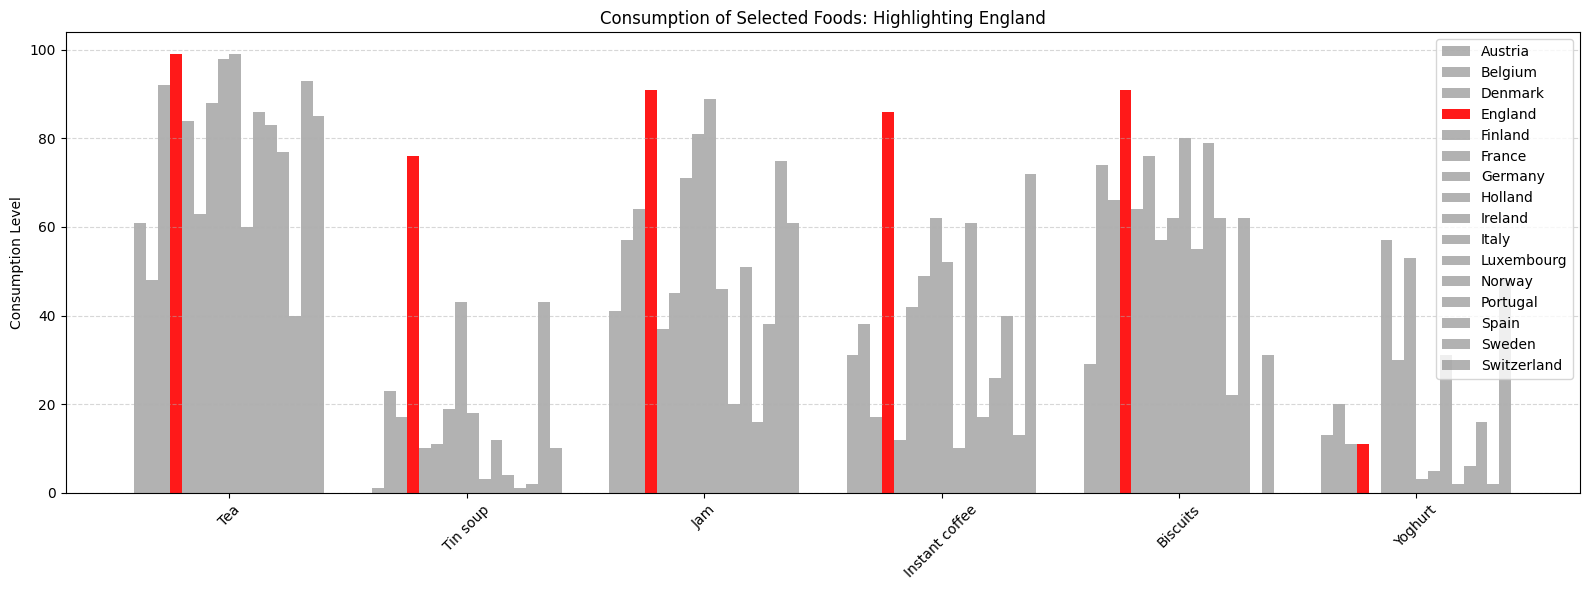

In [21]:
# Subset of interest
selected_columns = ['Tea', 'Tin soup', 'Jam', 'Instant coffee', 'Biscuits', 'Yoghurt']
subset = data[['Country'] + selected_columns]

# Sort for cleaner visuals (optional)
subset = subset.sort_values('Country')

# Plot setup
countries = subset['Country'].tolist()
values = subset[selected_columns].values  # shape: (num_countries, num_features)
num_countries = len(countries)
num_foods = len(selected_columns)

x = np.arange(num_foods)  # positions for foods
bar_width = 0.8 / num_countries  # so bars stay within each food group

plt.figure(figsize=(16, 6))

# Plot bars for each country
for i in range(num_countries):
    color = 'red' if countries[i] == 'England' else 'gray'
    alpha = 0.9 if countries[i] == 'England' else 0.6
    plt.bar(x + i * bar_width, values[i], width=bar_width, color=color, alpha=alpha, label=countries[i])

# Format axes
plt.xticks(x + bar_width * (num_countries / 2 - 0.5), selected_columns, rotation=45)
plt.ylabel("Consumption Level")
plt.title("Consumption of Selected Foods: Highlighting England")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Only show legend entry once for England
handles, labels = plt.gca().get_legend_handles_labels()
seen = set()
filtered = [(h, l) for h, l in zip(handles, labels) if not (l in seen or seen.add(l))]
plt.legend(*zip(*filtered), loc='upper right')

plt.tight_layout()
plt.show()


# Exercise 2

**Cannot find required data**